The cars_info dataset read below provides information regarding different cars like fuel-typr, horsepower, body_shape, peak-rmp 
etc. The data has been collected from https://archive.ics.uci.edu/ml/datasets/Automobile. <br>
The aim of the project is to predict what would be the price of each automobile based on the dataset information provided.

### Collecting Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars_info = pd.read_csv("cars.csv")
cars_info.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


The csv file read here doesn't contain the column names. So, adding the column names with the help of the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">source</a> the data
is taken from.

In [3]:
column_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
                'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type',
                'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
                'peak-rpm','city-mpg','highway-mpg','price']
cars_info = pd.read_csv("cars.csv",names=column_names)


In [4]:
cars_info.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
cars_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

### Data Cleaning and Feature Preparation

The missing values in the dataset are replaced with "?". Replacing the values with NaN can help to find out the number of missing values and work accordingly.

In [8]:
cars_info = cars_info.replace("?",np.nan)

The non-numeric values are no use here to predict the price of the cars. So, just dropping the columns that are non-numeric and probably don't affect the car price.

In [9]:
to_drop = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", 
           "body-style", "drive-wheels", "engine-location", "engine-type", 
           "num-of-cylinders", "fuel-system", "engine-size"]
cars_info = cars_info.drop(to_drop,axis=1)

In [10]:
cars_info.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
cars_info = cars_info.astype("float")
cars_info.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Dropping the rows not having the price column as it is the ultimate thing to determine.

In [14]:
cars_info = cars_info.dropna(subset=["price"])
cars_info.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
cars_info = cars_info.fillna(cars_info.mean())
cars_info.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
cars_info.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Normalization

In [17]:
normalized_cars_info = (cars_info-cars_info.mean())/(cars_info.max()-cars_info.min())
normalized_cars_info['price'] = cars_info['price']

In [18]:
normalized_cars_info.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


### Applying ML

In [19]:
def knn_train_test(features, target_col, df):
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [21]:
features = normalized_cars_info.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars_info)

results = pd.Series(rmse)
results.sort_values()

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-ratio    6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

Looking at the values, "Horsepower" has the least amount of error. With the help of this list, the features can be selected.
Now, looking at the different K values.

In [22]:
def knn_train_test2(features, target_col, df, k_values):
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [25]:
k = [1,3,5,7,9]
features = normalized_cars_info.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item,'price', normalized_cars_info, k)

feature_k_rmse

{'normalized-losses': {1: 7829.153502413683,
  3: 7515.021862294153,
  5: 7304.373172258108,
  7: 7634.134919298568,
  9: 7682.244506601594},
 'wheel-base': {1: 4493.734068810494,
  3: 5208.39331165465,
  5: 5460.78778823338,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4611.990241761035,
  3: 5129.672039752984,
  5: 5429.900972639673,
  7: 5311.883616635263,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4648.149766156945,
  5: 4908.609914413773,
  7: 4781.944236558163,
  9: 4719.070452207012},
 'height': {1: 8942.012951995952,
  3: 8378.23385277286,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.6701276238755,
  9: 4633.425879994758},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6806.695830075582,
  7: 6939.105845651802,
  9: 6915.297375013411},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8005

normalized-losses
average_rmse: 7592.985592573222
wheel-base
average_rmse: 5269.942030298831
length
average_rmse: 5173.30027712448
width
average_rmse: 4723.406333457191
height
average_rmse: 8129.737884260341
curb-weight
average_rmse: 4735.110369350003
bore
average_rmse: 7249.585404944475
stroke
average_rmse: 7990.349766848265
compression-ratio
average_rmse: 7166.0735987331045
horsepower
average_rmse: 4206.276166151255
peak-rpm
average_rmse: 8122.4771540352285
city-mpg
average_rmse: 5240.0943656464315
highway-mpg
average_rmse: 5085.212418997615


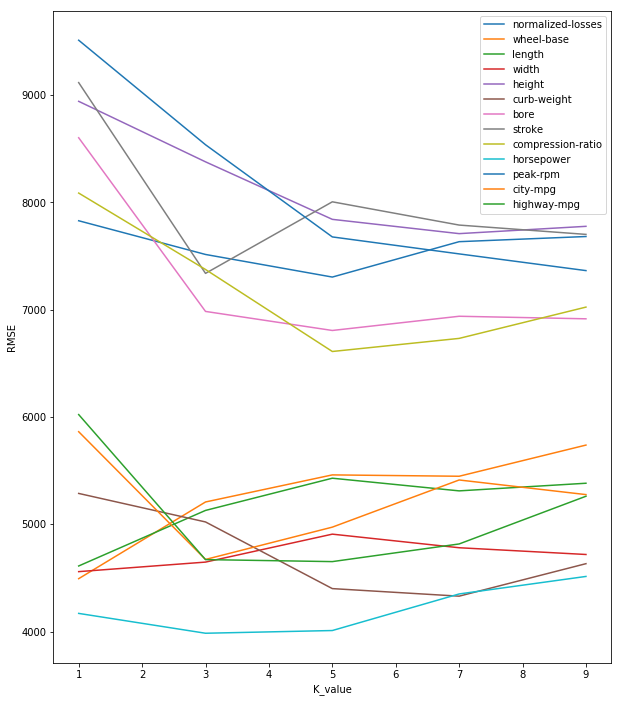

In [26]:
best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

A better way to do is to sort the features.

In [27]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-ratio',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

In [28]:
def knn_train_test3(features, target_col, df):
    
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [29]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars_info)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars_info)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars_info)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars_info)

In [30]:
k_rmse_features

{'best_two_rmse': 3635.0424706141075,
 'best_three_rmse': 3214.9121121904577,
 'best_four_rmse': 3404.6909417321376,
 'best_five_rmse': 3533.7489988020734}

Hence, looking at the best three features giving lowest RMSE.

In [31]:
def knn_train_test4(features, target_col, df, k_values):
    
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [32]:
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars_info, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars_info, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars_info, k)

In [33]:
feature_k_rmse2

{'best_three_features': {1: 2879.8872399542806,
  2: 2824.3660223522415,
  3: 2869.933838736334,
  4: 3141.137015378538,
  5: 3214.9121121904577,
  6: 3280.710541238062,
  7: 3421.1652350874347,
  8: 3379.778228190607,
  9: 3464.5878589864906,
  10: 3575.3981609613693,
  11: 3617.9433332156923,
  12: 3630.7516137575535,
  13: 3632.7823295462845,
  14: 3754.4036203105343,
  15: 3837.677054164043,
  16: 3841.760205882436,
  17: 3858.9773285906977,
  18: 3844.3626311824146,
  19: 3875.9053428113702,
  20: 3869.5372272718314,
  21: 3901.5634407576663,
  22: 3926.0570825223363,
  23: 4019.34604419612,
  24: 4048.5637998085253},
 'best_four_features': {1: 2870.800286876242,
  2: 2924.256000834373,
  3: 3217.2983830519292,
  4: 3392.3729838615423,
  5: 3404.6909417321376,
  6: 3532.1939129716366,
  7: 3523.454893817346,
  8: 3405.9189129672363,
  9: 3400.2247346580157,
  10: 3549.4612599577126,
  11: 3539.83054253496,
  12: 3562.1876094096256,
  13: 3675.4563993723814,
  14: 3770.166928307887

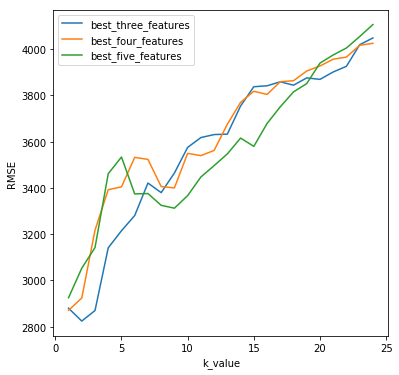

In [38]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

By observing the chart, we should choose best 3 features i.e. Horse-power, width and curb weight with a K=2. 